## ISYE 6740 - Assignment 2 - Classification

#### As we explore exciting new developments in AI, I want to provide some guidance around using chatbots like ChatGPT for our class assignments. 

#### The assignments are intended to develop your own skills and understanding. I encourage you to use ChatGPT liberally as a learning tool - discussing prompts and solutions with it can provide valuable insight into the problems. While ChatGPT can assist, make sure you are deeply engaged in working through the problems yourself. Take time to carefully review any suggestions from ChatGPT before submitting, and feel free to email me any prompts you find helpful. 

#### While directly copying ChatGPT solutions into assignments is not prohibited, I advise using discretion and care when relying on its outputs. The goal is to leverage this technology to enhance your learning, but not replace the thinking required, as I believe you do not want to regret being unable to answer machine learning questions well in a job interview.


### Q1) Linear SVM Classification


* In this question, we use the spam dataset to study linear SVM classifiers. For both training and testing data, the first 57 columns are different features of emails and the last column shows whether an email is spam (1 for spam). We will train linear SVM classifier models to predict if a given email is spam and explore how classification error changes with the parameter *C*.

* Please refer to the following package for Linear SVM classifier:\
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC

* Please standardize features in the dataset by removing the mean and scaling to unit variance. Refer to the following package for data standardization:\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

* For your linear SVM model, set max_iter = $10^4$ and tol = 1e-2. Ignore the warnings of SVM.

#### a) Standardize the training set.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [25]:
# import data
test = pd.read_csv('SPAM_test.csv')
train = pd.read_csv('SPAM_train.csv')
X_test = test.drop(test.columns[57], axis=1)
y_test = test.iloc[:, 57]
X_train = train.drop(train.columns[57], axis=1)
y_train = train.iloc[:, 57]
        
# Standardize the training set
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) #array

#### b) Train SVM classifiers for a range of *C* values $\{10^{-5}, 10^{-4}, 10^{-3}, \ldots, 10^{1}, 10^{2}\}$ using the standardized training set. 

In [26]:
C_values = np.logspace(-5, 2, num=8)  # C values ranging from 10^-5 to 10^2
models = []

for C in C_values:
    model = LinearSVC(C=C, max_iter=1e4, tol=1e-2)
    model.fit(X_train_std, y_train)
    models.append(model)

/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### c) Standardize the testing set using the statistics of the training set obtained in a).

In [27]:
X_test_std = scaler.transform(X_test) 
 # The reason for using fit_transform on the training data but only transform on the testing data 
    # involves the concept of data leakage and ensuring that the model is evaluated on truly unseen data 
    # during the testing phase.

#### d) Plot misclassification errors on the standardized testing set with respect to different $C$ values. 

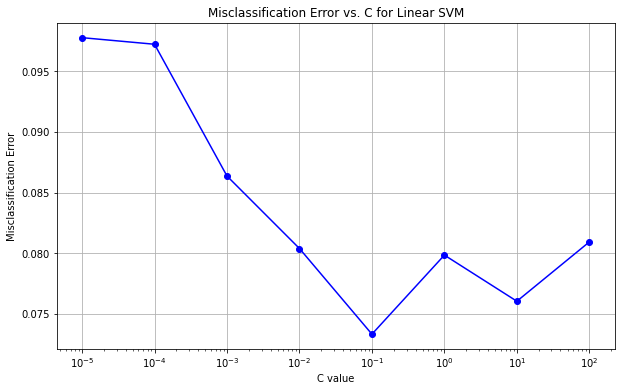

In [28]:
misclassification_errors = []

for model in models:
    y_pred = model.predict(X_test_std)
    error = np.mean(y_pred != y_test) 
    # (y_pred != y_test) returns a vector of boolean [True, False, ...] values.
    misclassification_errors.append(error)
    
#plotting
plt.figure(figsize=(10,6))
plt.semilogx(C_values, misclassification_errors, 
             marker = 'o', linestyle = '-', color = 'b')# semilogx: log scaling on the x axis
plt.xlabel('C value')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. C for Linear SVM')
plt.grid(True)
plt.show()


#### e) Report the optimal parameter $C^*$ and its misclassifcation error. 

In [29]:
min_error_index = np.argmin(misclassification_errors)
optimal_C = C_values[min_error_index]
optimal_error = misclassification_errors[min_error_index]

print(f"Optimal C: {optimal_C} with misclassification error: {optimal_error}")

Optimal C: 0.1 with misclassification error: 0.07332971211298207


#### f) With the optimal parameter $C^*$ obtained in e), which training data points are support vectors? Can you visualize your results using a histogram?

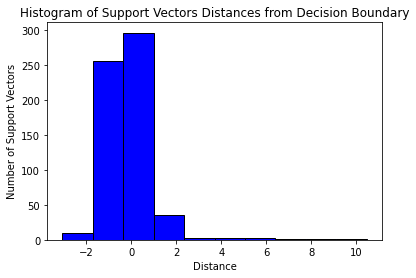

In [33]:
# LinearSVC in scikit-learn does not directly expose support vector indices. 
# If you need direct access to the support vectors, you might want to use SVC with kernel='linear' instead

from sklearn.svm import SVC

# Retrain with optimal C using SVC for direct access to support vectors
model_optimal_svc = SVC(C=optimal_C, kernel='linear', max_iter=1e4, tol=1e-2)
model_optimal_svc.fit(X_train_std, y_train)

# Accessing support vectors and their distances to the decision boundary
support_vectors = model_optimal_svc.support_vectors_

# Calculate distances of support vectors to the decision boundary
# This is an illustrative step; in practice, you might analyze coefficients or dual_coef_ to understand the margin
distances = model_optimal_svc.decision_function(support_vectors)

# Plotting histogram of distances

plt.hist(distances, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Support Vectors Distances from Decision Boundary')
plt.xlabel('Distance')
plt.ylabel('Number of Support Vectors')
plt.show()


#### g) How does C affect the bias and variance of your classifier?

In [8]:
# Insert Answer Here

### Q2) Regularized Logistic Regression

* We will train regularized logistic regression models on the same spam dataset and explore how the regularization parameter changes the classification error on the testing set.

* Please refer to the following package for Logistic Regression:\
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* Note that the scikit-learn package solves $\min_\theta CL(\theta)+\frac{1}{2}\|\theta\|_2^2$, where $L(\theta)$ is the logistic loss function and $C$ is the tuning parmaeter. $C$ is different from $\lambda$ we learnt in class. 

#### a) Train Logistic regression models for a range of *C* values $\{10^{-5}, 10^{-4}, 10^{-3}, \ldots, 10^{1}, 10^{2}\}$ using the standardized training set.

In [9]:
# Insert Code Here

#### b) Plot misclassification errors on the standardized testing set with respect to different *C* values. 

In [10]:
# Insert Code Here

#### c) Report the optimal parameter *C* and its misclassifcation error. 

In [11]:
# Insert Code Here

#### d) How does the classificaiton error of regularized logistic regression compare with that of support vector machine? Is there a big difference? Why?

In [12]:
# Insert Answer Here

## For quetion 3 to 5, please use pycasso package.

* Please refer to the following package for pycasso:\
https://hmjianggatech.github.io/picasso/


* We will train some models via pycasso and explore how the Lambda (the parameter of controling regularization) value changes the prediction error on the testing set.

* You can choose the type of models by specifying "family" and "penalty" in the solver. The solver has the attribute "lambdas" that can return calculated lambdas. 

*  You need to set lambdas = (N, r) in the solver so that N lambdas will be calculated and lambda_min_ratio = r. 


### Q3) Lasso Regression 

#### a) Standardize the training set.

In [12]:
# !pip install pycasso
import pycasso
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
df = pd.read_csv("./Question3_train.csv")
x_train = df.iloc[:,:-1].values
y_train = df.iloc[:,-1].values
df = pd.read_csv("./Question3_test.csv")
x_test = df.iloc[:,:-1].values
y_test = df.iloc[:,-1].values

scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)

#### b) Fit the training set for Question 3 using a Lasso model via pycasso.  Please set lambdas=(100, 0.02) in the solver. 

In [13]:
# Insert Code Here
s = pycasso.Solver(x_train,y_train ,lambdas = (100,0.02))
s.train()
print(s)

Training is over.
Model Type: gaussian
Penalty Type: l1
Sample Number: 296
Feature Number: 64
Lambda Number: 100
Training Time (ms): 0.0022847652435302734



#### c) Standardize the testing set using the statistics of the training set obtained in a).

In [14]:
x_test=scaler.transform(x_test)
mse_list=[]
err_min = 10**4
lambda_min = 100
for i,j in enumerate(s.lambdas):
    y_predict = s.predict(x_test,i)
    mse_test = mean_squared_error(y_test, y_predict)
    mse_list.append(mse_test)
    if(err_min>mse_test):
        it_min = i
        err_min = mse_test
        lambda_min = j


#### d) Plot the prediction error (use MSE as evaluation metric) on the standardized testing set vs. the Lambda parameter. Report the optimal parameter and its prediction error. 

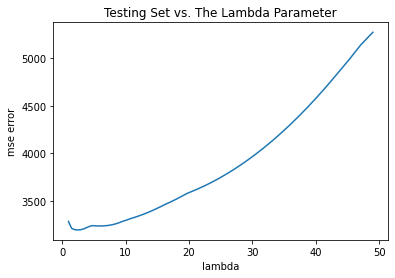

The optimal parameter is 2.433371755362587 with its correspsonding MSE(min) 3191.6960187522136


In [17]:
import matplotlib.pyplot as plt
plt.plot(s.lambdas, mse_list)
plt.title("Testing Set vs. The Lambda Parameter")
plt.xlabel("lambda")
plt.ylabel("mse error")
plt.show()
print("The optimal parameter is", lambda_min, "with its correspsonding MSE(min)", err_min)

#### e) How many variables does the optimal parameter select?

In [18]:
cnt = 0
sel = []
for i,j in enumerate(s.result['beta'][it_min]):
    if j != 0:
        cnt+=1;
        sel.append(i)
        print(j)
print(f"number of variables selected is {cnt}")
print(sel)

-3.5886087496579924
26.536041692634537
10.34506630454296
-1.1976120365112144
-7.660857292770131
26.84570451378869
2.417088554831586
2.920175855192962
1.6641974990142874
1.782670932333506
8.51622285272234
1.0240113575472922
-1.5829014177249467
3.8758556618348132
0.7328367193985375
2.0646026622286207
3.5033635894320474
1.157360169057098
number of variables selected is 18
[1, 2, 3, 4, 6, 8, 10, 11, 12, 18, 19, 21, 23, 27, 28, 32, 36, 45]


#### f) Train a linear regression model (without any regularization) using only the variables selected in e). Report the prediction error on the standardized testing set.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

sel.append(-1)
df = pd.read_csv("./Question3_train.csv")
df_new = df.iloc[:,sel]
x_train = df_new.iloc[:,:-1].values
y_train = df_new.iloc[:,-1].values

df = pd.read_csv("./Question3_test.csv")
df_new = df.iloc[:,sel]
x_test = df_new.iloc[:,:-1].values
y_test = df_new.iloc[:,-1].values

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
y_predictions = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_predictions)
print(mse_test)


3286.337866330763


#### g) How does the prediction error in f) compare with the prediction error in d)? Why?

In [19]:
# Insert Answer Here The prediction error in d is higher, this could possibly that the regulation penalized noise, outlier fitting, whereas the linear model has overfitted

#### h) How does the regularization parameter affect bias and variance.

In [20]:
# bias will increases  but the variance decreases.

#### i) Plot out the regularization path (coefficient vs regularization parameter lambda).

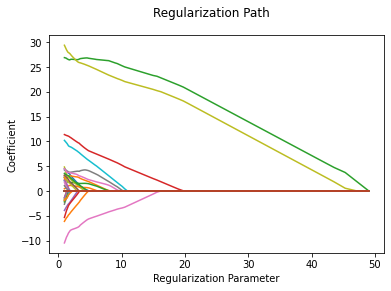

In [20]:
s.plot()


#### j) Based on the regularization path, please list the most important 5 variables.

In [21]:
for i,n in enumerate(s.result['beta']):
    cnt = 0;
    lis_v =[]
    for j,m in enumerate(s.result['beta'][i]):
        if s.result['beta'][i][j] != float(0):
            cnt+=1
            lis_v.append(j)
    if cnt == 5:
        break
df = pd.read_csv("./Question3_train.csv")
print(df.columns[lis_v]) # The most important is

Index(['bmi', 'map', 'hdl', 'ltg', 'age:sex'], dtype='object')


### Q4) Logistic Lasso Regression 

#### a) Fit the spam dataset using a Logistic Lasso model via pycasso (You need to follow the same standardization procedure as in Q1). Please set lambdas=(100, 0.05) in the solver. 

In [103]:
import pycasso
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
df = pd.read_csv("./SPAM_train.csv")
x_train = df.iloc[:,:-1].values
y_train = df.iloc[:,-1].values
df = pd.read_csv("./SPAM_test.csv")
x_test = df.iloc[:,:-1].values
y_test = df.iloc[:,-1].values

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
s_l = pycasso.Solver(x_train,y_train ,lambdas = (100,0.05),family = "binomial")
s_l.train()
print(s)

Training is over.
Model Type: binomial
Penalty Type: mcp
Sample Number: 2760
Feature Number: 57
Lambda Number: 100
Training Time (ms): 0.1688988208770752



#### b) Plot the misclassification error on the standardize testing set vs. the Lambda parameter. Report the optimal parameter and its misclassifcation error. 

In [104]:
x_test = scaler.transform(x_test)
err_l = []
err_min = 10**4
optimal_lab = 100
# print(s.result['beta'][99])
for i,j in enumerate(s_l.lambdas):
    y_predict = s_l.predict(x_test,i)
#     print(y_predict.min(),y_predict.max())
#     for i in y_predict:
#         if(i>0.5):
#             i=1
#         else:
#             i=0
#     print(y_test, y_predictions)
#     error = 1 - accuracy_score(y_test, y_predict)
    error = mean_squared_error(y_test, y_predict)
    err_l.append(error)
    if(err_min>error):
        it_min = i
        err_min = error
        optimal_lab = j
print(j)
print(err_min)
# print(s.results['beta'][it_min])


0.009790042056365479
0.34062927031964085


#### c) How many variables does the optimal parameter select?

In [105]:
cnt = 0
sel = []
for i,j in enumerate(s_l.result['beta'][it_min]):
    if j != 0:
        cnt+=1;
        sel.append(i)
        print(j)
print(f"number of variables selected is {cnt}")
print(sel)

0.1257113976421836
0.046962024327368554
number of variables selected is 2
[20, 51]


#### d) Train a logistic regression model (without any regularization) using only the variables selected in e). Report the prediction error on the standardized testing set.

In [106]:
sel.append(-1)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv("./SPAM_train.csv")
df_new = df.iloc[:,sel]
x_train = df_new.iloc[:,:-1].values
y_train = df_new.iloc[:,-1].values
df = pd.read_csv("./SPAM_test.csv")
df_new = df.iloc[:,sel]
x_test = df_new.iloc[:,:-1].values
y_test = df_new.iloc[:,-1].values

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)
y_predictions = model.predict(x_test)
for i in y_predictions:
    if(i>0.5):
        i=1
    else:
        i=0
# print(y_test, y_predictions)
error = 1 - accuracy_score(y_test, y_predictions)        
# mse_test = mean_squared_error(y_test, y_predictions)
print("The prediction error on the standardized testing set is", error)

The prediction error on the standardized testing set is 0.1971754481260185


#### e) How does the prediction error in d) compare with the prediction error in b)? Why?

In [27]:
###prediction error in d is lower, because in b the regularization has penalized the overfited data, where as in d, there could be a better fit model only considering important terms.

#### f) How does the regularization  parameter affect bias and variance.

In [28]:
# Possibly first reach a optimal model with smaller bias and variance and then goes up with largr extent regularization

#### g) Plot out the regularization path (coefficient vs regularization parameter lambda).

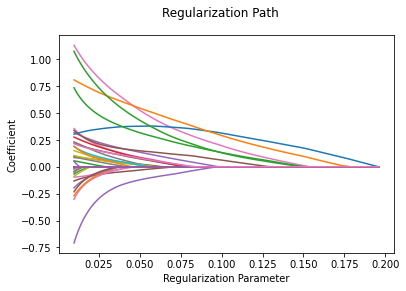

In [107]:
s_l.plot()

### Q5) Logistic MCP Regression

#### a) Fit the provided spam dataset using a Logistic model with MCP regularization via pycasso (You need to follow the same standardization procedure as in Q1).  Please set lambdas=(100, 0.05) and gamma=1.25. 

In [99]:
import pycasso
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
df = pd.read_csv("./SPAM_train.csv")
x_train = df.iloc[:,:-1].values
y_train = df.iloc[:,-1].values
df = pd.read_csv("./SPAM_test.csv")
x_test = df.iloc[:,:-1].values
y_test = df.iloc[:,-1].values

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
s_mcp = pycasso.Solver(x_train,y_train ,lambdas = (100,0.05), penalty = 'mcp' , gamma=  1.25,family = "binomial")
s_mcp.train()
print(s_mcp)

Training is over.
Model Type: binomial
Penalty Type: mcp
Sample Number: 2760
Feature Number: 57
Lambda Number: 100
Training Time (ms): 0.29384922981262207



#### b) Plot the misclassification error on the testing set vs. the Lambda parameter. Report the optimal parameter and its misclassifcation error.

0.009790042056365479
0.3773385951875386


Text(0.5, 1.0, 'Misclassification error on the testing set vs. the Lambda parameter')

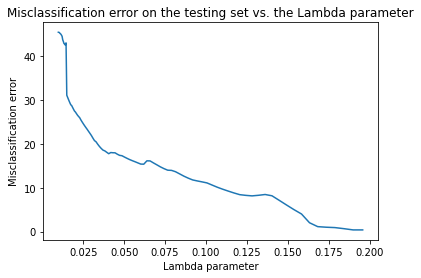

In [100]:
x_test = scaler.transform(x_test)
err_mcp = []
err_min = 10**4
optimal_lab = 100
for i,j in enumerate(s_mcp.lambdas):
    y_predict = s_mcp.predict(x_test,i)
    error = mean_squared_error(y_test, y_predict)
    err_mcp.append(error)
    if(err_min>error):
        it_min = i
        err_min = error
        optimal_lab = j
print(j)
print(err_min)

plt.plot(s_mcp.lambdas,err_mcp)
plt.xlabel("Lambda parameter")
plt.ylabel("Misclassification error")
plt.title("Misclassification error on the testing set vs. the Lambda parameter")

#### c) How many variables does the optimal parameter select?

In [101]:
cnt = 0
sel = []
for i,j in enumerate(s_mcp.result['beta'][it_min]):
    if j != 0:
        cnt+=1;
        sel.append(i)
        print(j)
print(f"number of variables selected is {cnt}")
print(sel)

0.3453217164101065
number of variables selected is 1
[20]


#### d) Plot out the regularization path (coefficient vs regularization parameter lambda)

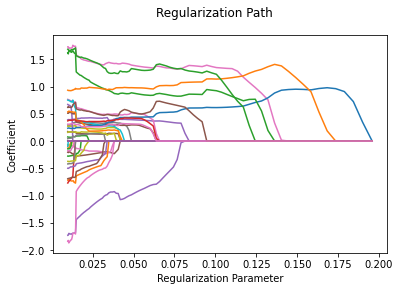

In [102]:
s_mcp.plot()

#### e) Plot the misclassification error vs. the number of nonzero entries in the logistic regression coefficient using MCP vs Lasso in Q4 and Q5 by varying the regularizaiton parameter. What do you observe? Why?

Text(0.5, 1.0, 'Misclassification error on the testing set vs. the Lambda parameter')

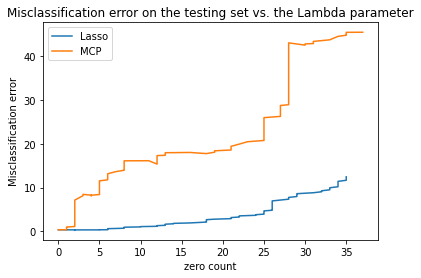

In [110]:
l_coef = s_l.coef()['beta']
mcp_coef = s_mcp.coef()['beta']
lis_l=[]
lis_mcp=[]
for i in l_coef:
    cnt = 0;
    for coef in i:
        if(coef!=0):
            cnt+=1;
    lis_l.append(cnt)
for i in mcp_coef:
    cnt = 0;
    for coef in i:
        if(coef!=0):
            cnt+=1;
    lis_mcp.append(cnt)

plt.plot(lis_l,err_l,label="Lasso")
plt.plot(lis_mcp,err_mcp,label="MCP")
plt.xlabel("zero count")
plt.ylabel("Misclassification error")
plt.legend()
plt.title("Misclassification error on the testing set vs. the Lambda parameter")

### Q6) K-Fold Cross Validation

* Similar to Q1,  we will use the spam dataset to train linear SVM Classifiers using K-Fold cross validation to optimize C. Ignore the warnings of SVM. 

* Data need to be standardized as the way you did in Q1.

* Please refer to the following package for K-Fold cross validation:\
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

* For your linear SVM model, set max_iter = $10^4$ and tol = 1e-2. Ignore the warnings of SVM.

#### a) Please find an optimal C for a range of *C* values $\{10^{-5}, 10^{-4}, 10^{-3}, \ldots, 10^{1}, 10^{2}\}$ under different values of K = [2, 3, 5, 7, 10]. 

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# Load training and test data
df_train = pd.read_csv("./SPAM_train.csv")
x_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values
df_test = pd.read_csv("./SPAM_test.csv")
x_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Range of C values
C_list = [10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1), 1, 10, 10**(2)]

# List to store the average cross-validation error for each C
cv_err = []
dic_error = {"K=2": (1,10**(-5)), "K=3":(1,10**(-5)) , "K=5": (1,10**(-5)), "K=7": (1,10**(-5)), "K=10": (1,10**(-5))}
# Perform cross-validation
df=[]
for c in C_list:
    clf = LinearSVC(tol=1e-2, max_iter=10**4, C=c)
    # Cross-validation with different values of K
    row = []
    for k in [2, 3, 5, 7, 10]:
        scores = cross_val_score(clf, x_train, y_train, cv=k, scoring='accuracy')
        average_error = 1 - np.mean(scores)
        dic_error[f"K={k}"] = (average_error,c) if (average_error< (dic_error[f"K={k}"])[0]) else dic_error[f"K={k}"] 
        row.append(average_error)
    df.append(row)
df = pd.DataFrame(df, columns=['K=2', 'K=3', 'K=5','K=7', 'K=10'])
print(df)
print(dic_error)

/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning

/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


        K=2       K=3       K=5       K=7      K=10
0  0.098551  0.096377  0.096014  0.096016  0.095290
1  0.093478  0.092029  0.093478  0.092754  0.091667
2  0.089493  0.089493  0.089130  0.088044  0.087319
3  0.085870  0.080072  0.080072  0.079716  0.078261
4  0.081884  0.073551  0.075725  0.076093  0.076812
5  0.080435  0.074638  0.074275  0.076820  0.075362
6  0.080072  0.074638  0.076449  0.077544  0.076087
7  0.077899  0.072826  0.075362  0.075004  0.070652
{'K=2': (0.0778985507246377, 100), 'K=3': (0.07282608695652171, 100), 'K=5': (0.07427536231884058, 1), 'K=7': (0.0750039011942244, 100), 'K=10': (0.07065217391304335, 100)}


/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### b) Retrain the model on the entire training set with the optimal C and report classification error on the testing set.

In [7]:
from sklearn.metrics import accuracy_score
clf = LinearSVC(tol=1e-2,max_iter =10**4, C=0.1  ) # with dual set to auto, the testing error increases without warning
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
error = 1 - accuracy_score(y_test, y_predict)
print(error)

0.07332971211298212


#### c) Explain how the classification error on the validation datasets and the testing datasets change with K. Why?

In [37]:
The error first decreases until reach a optimal K and then increases. With small K like, the model is trained with half data, the variance is large since because the validation sets can be quite different from each other. With large K, the bias can be large, since the model is trained on most of the data, could lead to overfitting.  